# Fraud Detection Model

------------------

## Importing necessary libraries required for EDA

In [85]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [86]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score

### Reading data and loading into 'data'

In [87]:
data = pd.read_csv('Fraud.csv')

### Checking the number of records present in the dataset. We have 11 fields/attributes and we have around 6M records

In [88]:
data.shape

(6362620, 11)

In [89]:
data.columns

Index(['step', 'type', 'amount', 'nameOrig', 'oldbalanceOrg', 'newbalanceOrig',
       'nameDest', 'oldbalanceDest', 'newbalanceDest', 'isFraud',
       'isFlaggedFraud'],
      dtype='object')

### Checking datatype in of each field

In [90]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            object 
 2   amount          float64
 3   nameOrig        object 
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        object 
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         int64  
 10  isFlaggedFraud  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 534.0+ MB


### Describe command gives the statistical analysis of the whole data

In [91]:
data.describe()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
count,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06
mean,2.433972e+02,1.798619e+05,8.338831e+05,8.551137e+05,1.100702e+06,1.224996e+06,1.290820e-03,2.514687e-06
std,1.423320e+02,6.038582e+05,2.888243e+06,2.924049e+06,3.399180e+06,3.674129e+06,3.590480e-02,1.585775e-03
min,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.560000e+02,1.338957e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,2.390000e+02,7.487194e+04,1.420800e+04,0.000000e+00,1.327057e+05,2.146614e+05,0.000000e+00,0.000000e+00
75%,3.350000e+02,2.087215e+05,1.073152e+05,1.442584e+05,9.430367e+05,1.111909e+06,0.000000e+00,0.000000e+00
max,7.430000e+02,9.244552e+07,5.958504e+07,4.958504e+07,3.560159e+08,3.561793e+08,1.000000e+00,1.000000e+00


In [92]:
data.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


### Checking for null values in the data

In [93]:
data.isnull().sum()

step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
isFlaggedFraud    0
dtype: int64

Thus as we can see there are no null values, thus we dont need to process anything regarding null values. 
Lets check for other parameters

# Univariate Analysis

### 1. Countplot for the column 'type'

<Axes: xlabel='type', ylabel='count'>

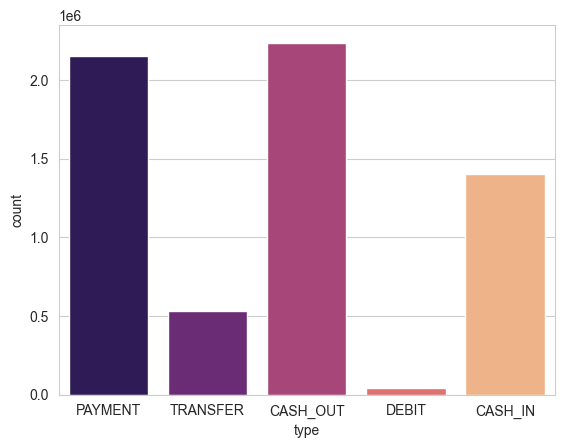

In [94]:
sns.countplot(x=data['type'],palette='magma')

Thus the highest transaction type is CASH_OUT

### 2. Observing distribution in 'step' column

C:\Users\EXC FA1TH\AppData\Local\Temp\ipykernel_6388\792014044.py:1: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.displot(x=data['step'],palette='magma')


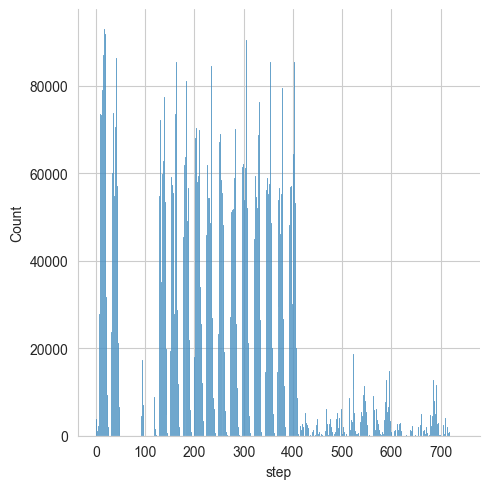

In [145]:
sns.displot(x=data['step'],palette='magma')

# CORRELATION HEATMAP

C:\Users\EXC FA1TH\AppData\Local\Temp\ipykernel_6388\1997754966.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data.corr(),annot=True)


<Axes: >

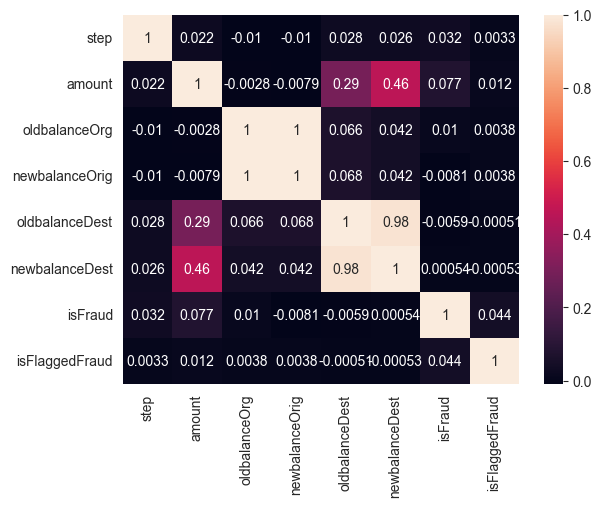

In [96]:
# Heatmap
sns.heatmap(data.corr(),annot=True)

# Observing the target column

In [97]:
legit = len(data[data.isFraud == 0])
fraud = len(data[data.isFraud == 1])
legit_percent = (legit / (fraud + legit)) * 100
fraud_percent = (fraud / (fraud + legit)) * 100

print("Number of Legit transactions: ", legit)
print("Number of Fraud transactions: ", fraud)
print("Percentage of Legit transactions: {:.4f} %".format(legit_percent))
print("Percentage of Fraud transactions: {:.4f} %".format(fraud_percent))

Number of Legit transactions:  6354407
Number of Fraud transactions:  8213
Percentage of Legit transactions: 99.8709 %
Percentage of Fraud transactions: 0.1291 %


# As we can see the difference between the Fraud values varies too much. Thus data is imbalanced.

----

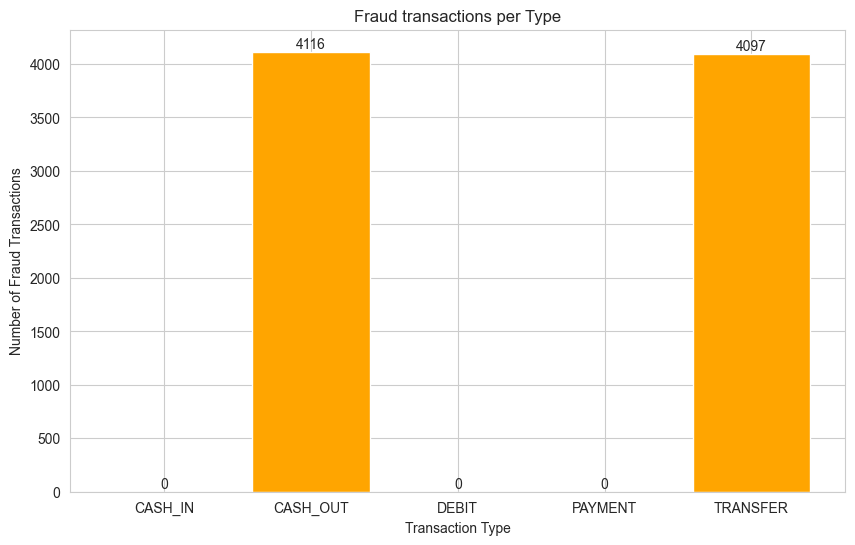

In [98]:
fraud_trans_type = data.groupby('type')['isFraud'].sum().reset_index()
sns.set_style('whitegrid')
plt.figure(figsize=(10, 6))
plt.bar(fraud_trans_type['type'], fraud_trans_type['isFraud'], color='#FFA500')
plt.xlabel('Transaction Type')
plt.ylabel('Number of Fraud Transactions')
plt.title('Fraud transactions per Type')
for index, value in enumerate(fraud_trans_type['isFraud']):
    plt.text(index, value, str(value), ha='center', va='bottom')
plt.show()

---

# Preprocessing

In [99]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
data['type'] = le.fit_transform(data['type'])

In [100]:
col_obj = data[['step','type','amount','oldbalanceOrg','newbalanceOrig','oldbalanceDest','newbalanceDest']]
col_obj

,step,type,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest
0,1,3,9839.64,170136.00,160296.36,0.00,0.00
1,1,3,1864.28,21249.00,19384.72,0.00,0.00
2,1,4,181.00,181.00,0.00,0.00,0.00
3,1,1,181.00,181.00,0.00,21182.00,0.00
4,1,3,11668.14,41554.00,29885.86,0.00,0.00
...,...,...,...,...,...,...,...
6362615,743,1,339682.13,339682.13,0.00,0.00,339682.13
6362616,743,4,6311409.28,6311409.28,0.00,0.00,0.00
6362617,743,1,6311409.28,6311409.28,0.00,68488.84,6379898.11
6362618,743,4,850002.52,850002.52,0.00,0.00,0.00


In [101]:
col_obj.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 7 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            int32  
 2   amount          float64
 3   oldbalanceOrg   float64
 4   newbalanceOrig  float64
 5   oldbalanceDest  float64
 6   newbalanceDest  float64
dtypes: float64(5), int32(1), int64(1)
memory usage: 315.5 MB


# Boxplots

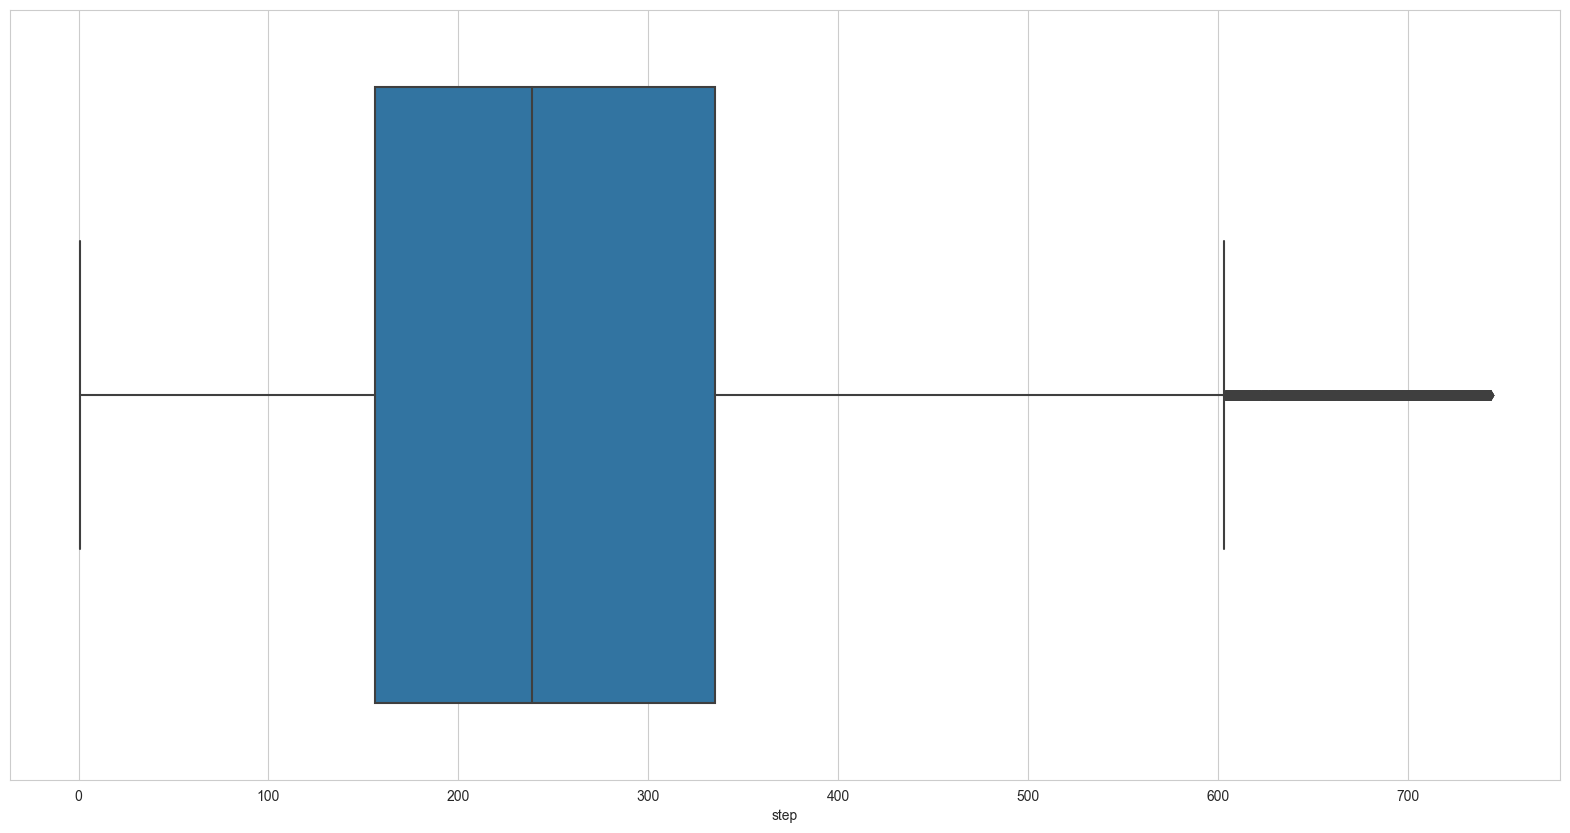

In [102]:
plt.figure(figsize=(20,10))
sns.boxplot(x=col_obj['step'])
plt.show()

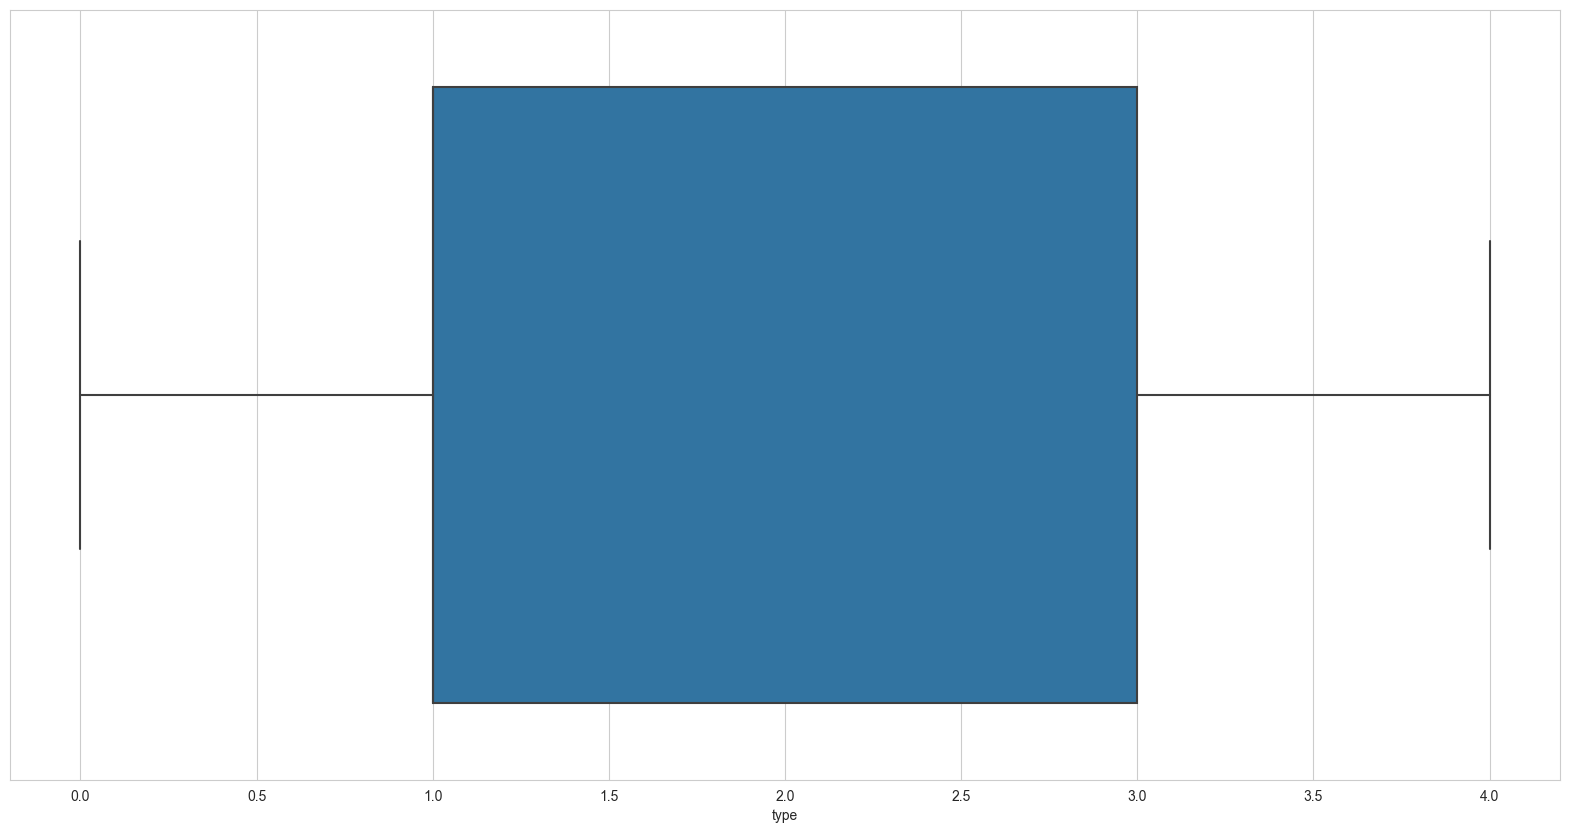

In [103]:
plt.figure(figsize=(20,10))
sns.boxplot(x=col_obj['type'])
plt.show()

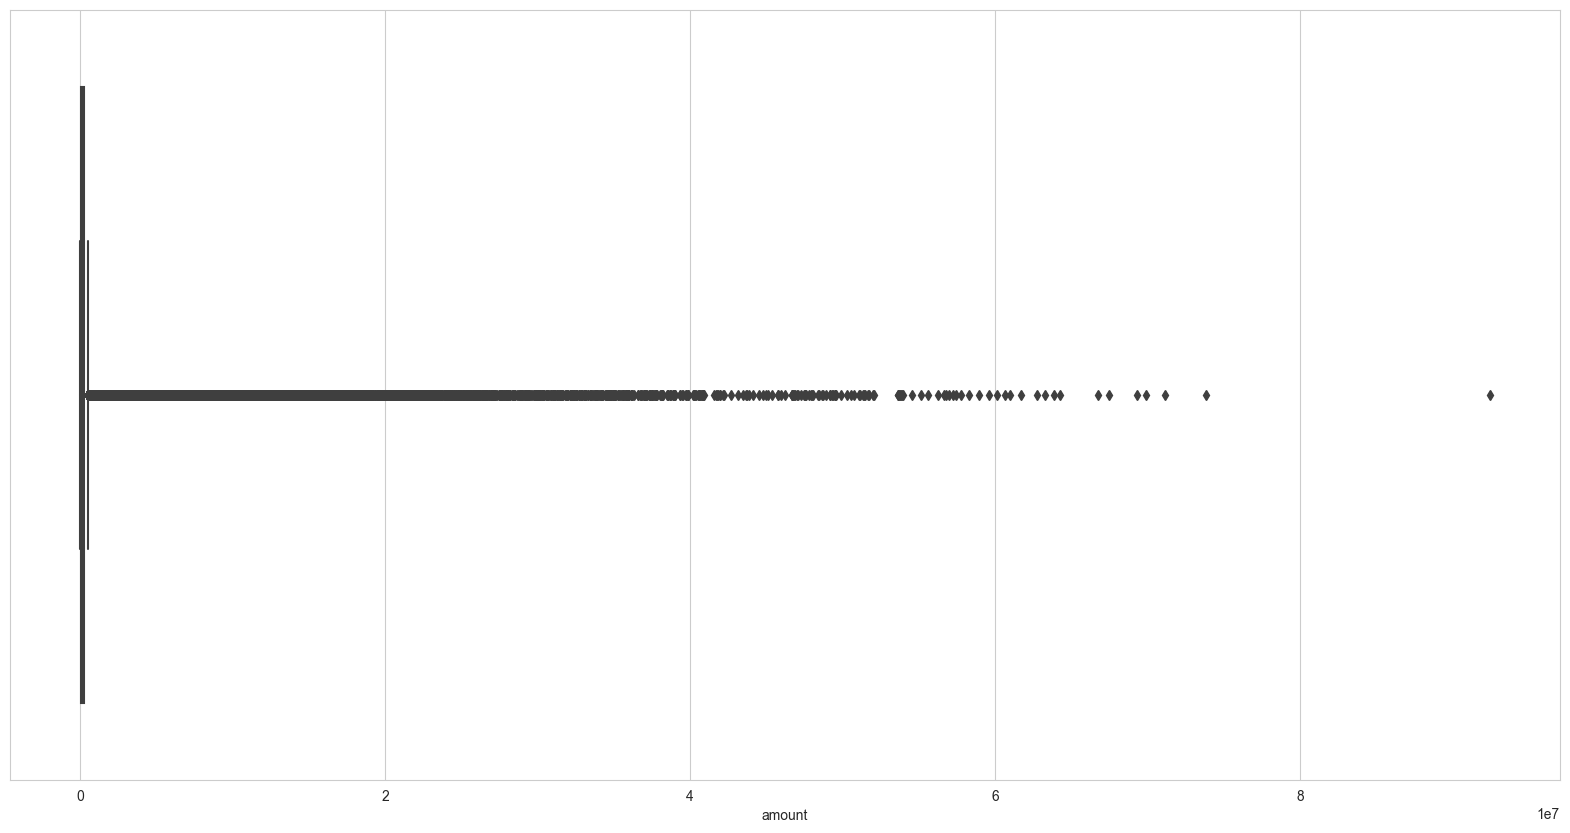

In [104]:
plt.figure(figsize=(20,10))
sns.boxplot(x=col_obj['amount'])
plt.show()

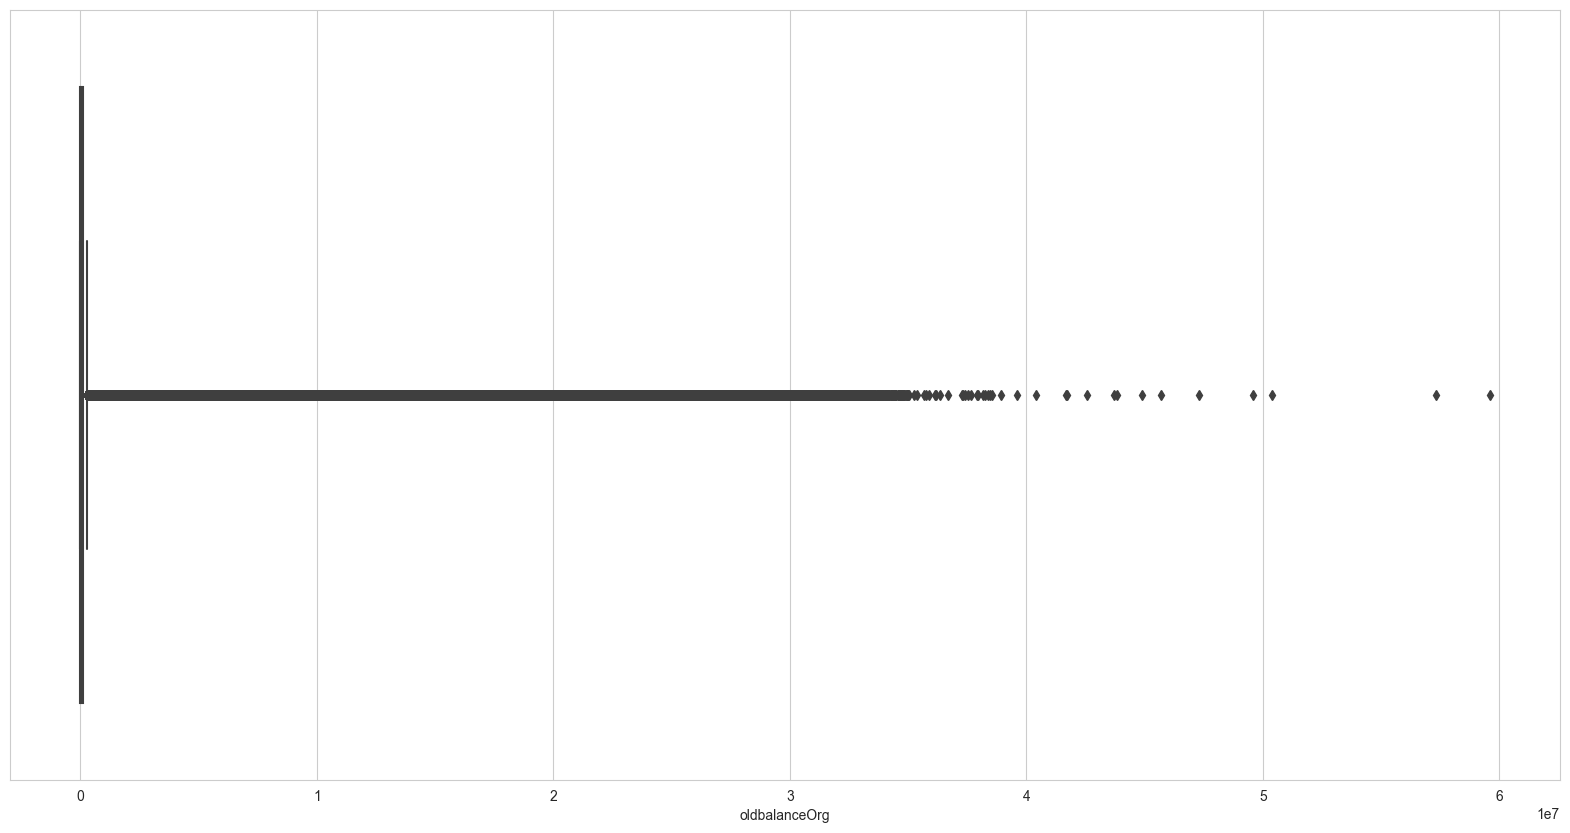

In [105]:
plt.figure(figsize=(20,10))
sns.boxplot(x=col_obj['oldbalanceOrg'])
plt.show()

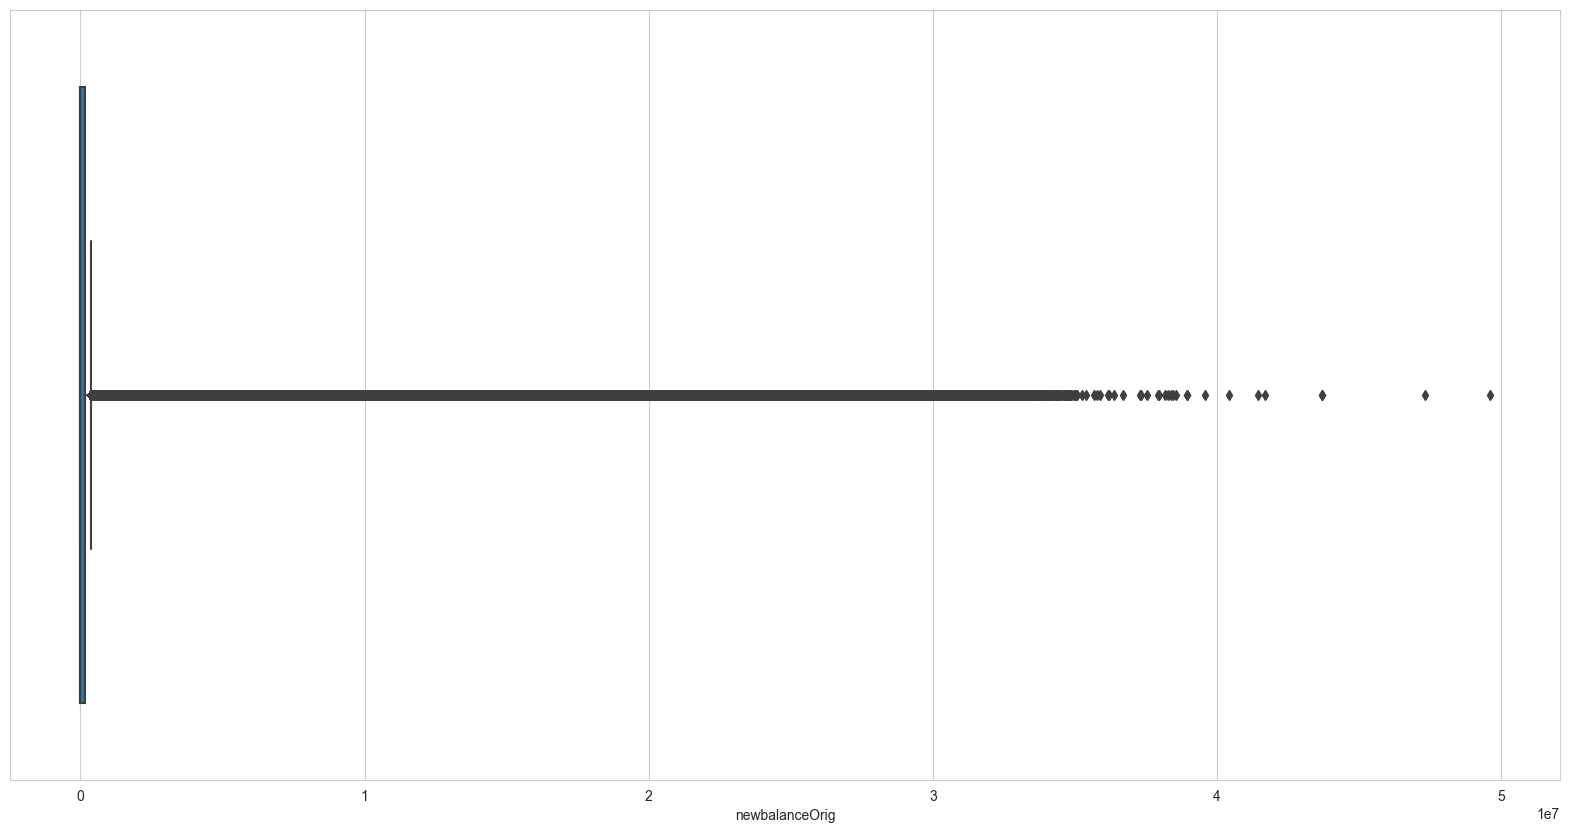

In [106]:
plt.figure(figsize=(20,10))
sns.boxplot(x=col_obj['newbalanceOrig'])
plt.show()

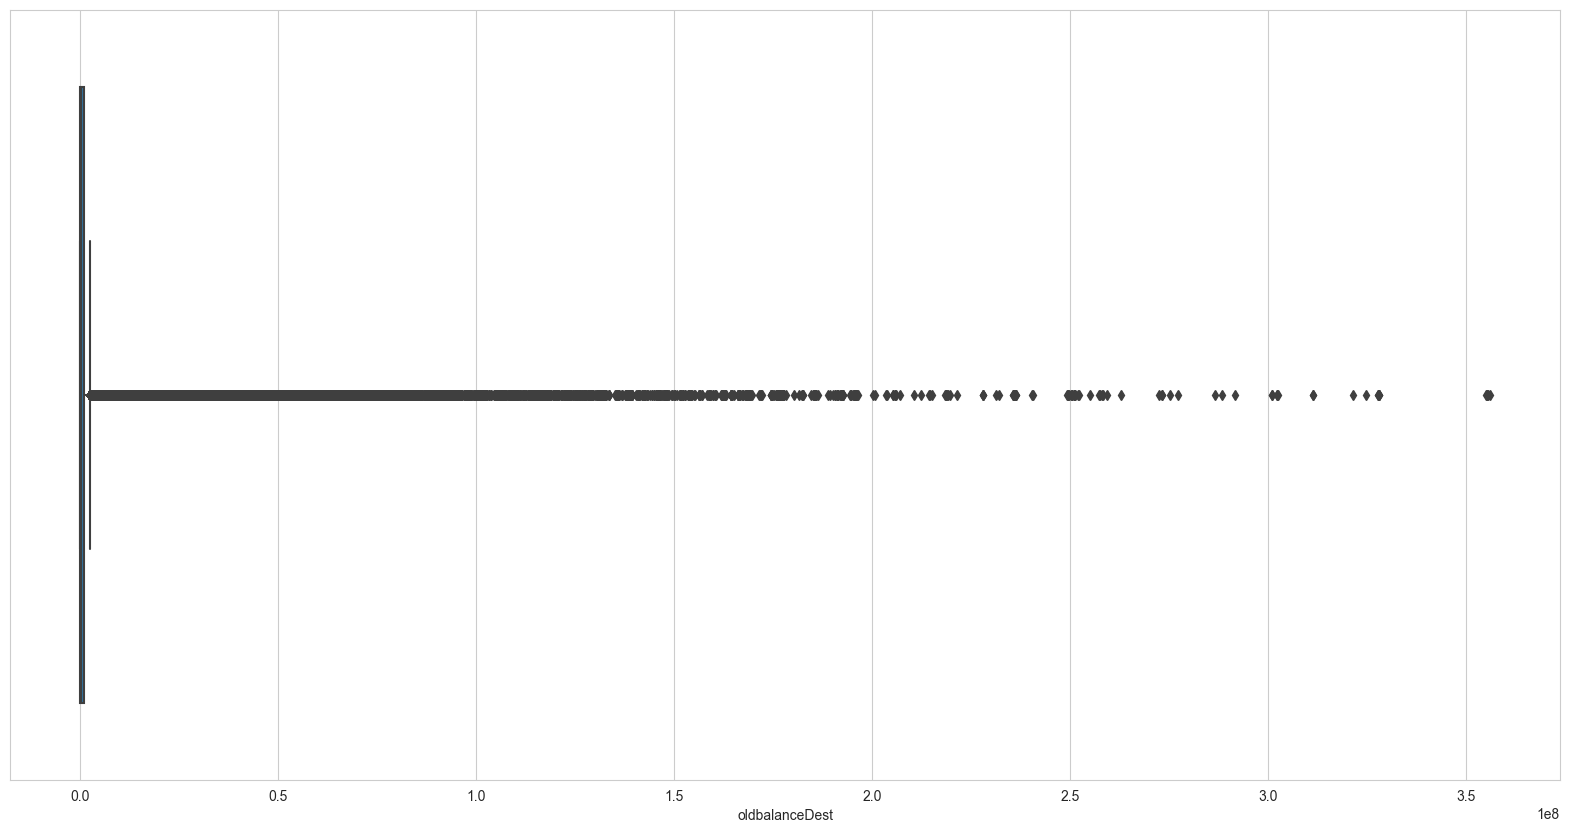

In [107]:
plt.figure(figsize=(20,10))
sns.boxplot(x=col_obj['oldbalanceDest'])
plt.show()

<Axes: xlabel='newbalanceDest'>

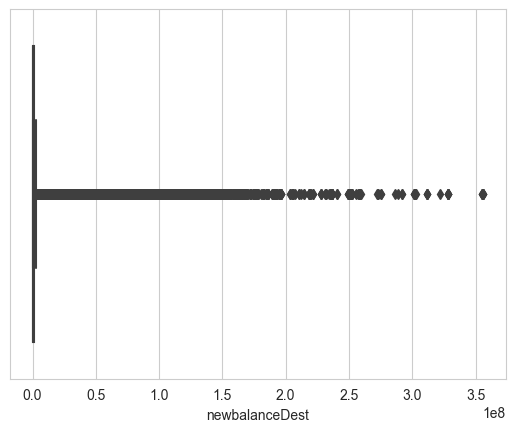

In [108]:
sns.boxplot(x=col_obj['newbalanceDest'])

# Scaling Data

In [109]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler( )
col_obj=sc.fit_transform(col_obj)
col_obj = pd.DataFrame(col_obj)

In [110]:
col_obj.rename(columns={col_obj.columns[0]: 'step', col_obj.columns[1]: 'type',col_obj.columns[2]: 'amount',col_obj.columns[3]: 'oldbalanceOrg',col_obj.columns[4]: 'newbalanceOrig',col_obj.columns[5]: 'oldbalanceDest',col_obj.columns[6]: 'newbalanceDest'}, inplace=True)

<Axes: >

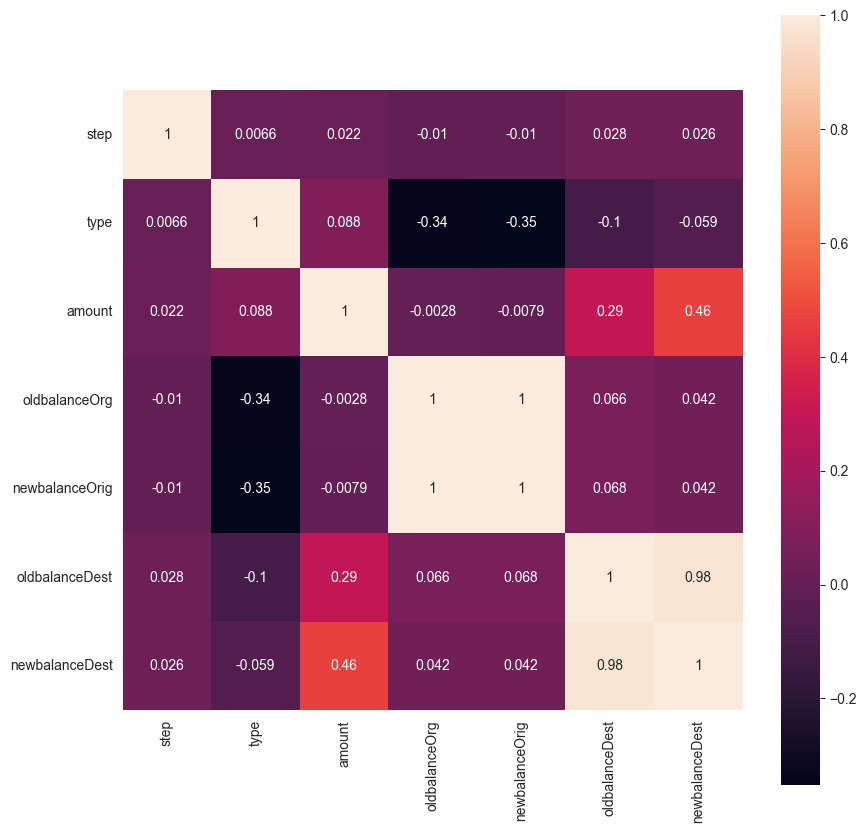

In [111]:
plt.figure(figsize=(10,10))
sns.heatmap(col_obj.corr(),annot=True,square=True)

In [112]:
col_obj.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 7 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            float64
 1   type            float64
 2   amount          float64
 3   oldbalanceOrg   float64
 4   newbalanceOrig  float64
 5   oldbalanceDest  float64
 6   newbalanceDest  float64
dtypes: float64(7)
memory usage: 339.8 MB


In [113]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
for i in range(0,len(col_obj.columns)):
    print(variance_inflation_factor(col_obj.values,i))


1.0024428655929882
1.2681769595357277
3.713503567615642
459.0687715633641
464.1806008665591
65.95091231949021
75.77397268946811


1. Here we have calculated the Variance Inflation Factor of the independent variables
2.	Before doing this, we have converted the  datatype of ‘type’ column from object to numerical using the label encoder.
3.	We can see that oldbalanceOrg and newbalanceOrig have too high VIF thus they are highly correlated. Similarly oldbalanceDest and newbalanceDest. Also nameDest is connected to nameOrig.
    Thus combine these pairs of collinear attributes and drop the individual ones.
4.	But these columns are significant for model building and analysis. Thus we will adjust the columns in the further steps.

In [114]:
data['Actual_amount_orig'] = data.apply(lambda x: x['oldbalanceOrg'] - x['newbalanceOrig'],axis=1)
data['Actual_amount_dest'] = data.apply(lambda x: x['oldbalanceDest'] - x['newbalanceDest'],axis=1)

In [115]:
data.drop(['oldbalanceOrg','newbalanceOrig','oldbalanceDest','newbalanceDest','nameOrig','nameDest','isFlaggedFraud'],axis=1,inplace=True)

In [116]:
data.columns

Index(['step', 'type', 'amount', 'isFraud', 'Actual_amount_orig',
       'Actual_amount_dest'],
      dtype='object')

# Rechecking VIF

In [117]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
for i in range(0,len(data.columns)):
    print(variance_inflation_factor(data.values,i))

2.089797375798732
2.03928063055464
3.882315593200927
1.185547495038135
1.293012798377302
3.773312296201784


Thus the strong colinearity is removed. And we can proceed with model building

<Axes: >

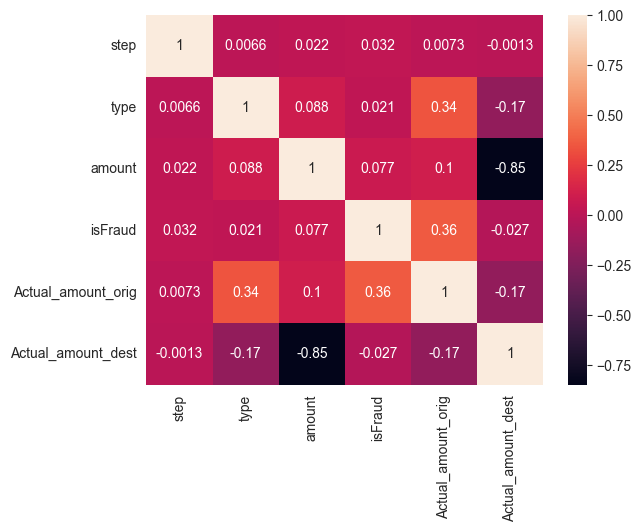

In [118]:
sns.heatmap(data.corr(),annot=True)

-----

# Formation of Independent and Dependent Variables for Model training and testing

In [119]:
x = data.drop('isFraud',axis=1)
y = data['isFraud']

# Splitting data into training and testing data set

In [120]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.25)


# Scaling using Robust Scalar

In [121]:
from sklearn.preprocessing import RobustScaler

re=RobustScaler()

x_train = re.fit_transform(x_train)
x_test  = re.transform(x_test)

# Prediction using Decision Tree 
------------

In [122]:
from sklearn.tree import DecisionTreeClassifier as dt
decisiontreemodel = dt(criterion='entropy')
decisiontreemodel.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy')

In [123]:
y_decision_tree = decisiontreemodel.predict(x_test)
y_decision_tree

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [136]:
print('-'*75)
print('Decision Tree')
print('-'*75)
print()
print('-'*75)
print('Classification Report')
print('-'*75)
print(classification_report(y_test,y_decision_tree))
print('-'*75)
print('Confusion Matrix')
print('-'*75)
confusion_matrix_dt = confusion_matrix(y_test,y_decision_tree)
print(confusion_matrix(y_test,y_decision_tree))
print('-'*75)
print('Accuracy Score')
print('-'*75)
y_decision_tree_acc = accuracy_score(y_test,y_decision_tree)
print(y_decision_tree_acc)

---------------------------------------------------------------------------
Decision Tree
---------------------------------------------------------------------------

---------------------------------------------------------------------------
Classification Report
---------------------------------------------------------------------------
              precision    recall  f1-score   support

           0       1.00      1.00      1.00   1588581
           1       0.81      0.79      0.80      2074

    accuracy                           1.00   1590655
   macro avg       0.90      0.89      0.90   1590655
weighted avg       1.00      1.00      1.00   1590655

---------------------------------------------------------------------------
Confusion Matrix
---------------------------------------------------------------------------
[[1588192     389]
 [    444    1630]]
---------------------------------------------------------------------------
Accuracy Score
---------------------------------

------
Random Forest
------

In [130]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=20,criterion="entropy")
mod2 = rf.fit(x_train,y_train)
y_predrf = mod2.predict(x_test)

In [135]:
print('-'*75)
print('Random Forest')
print('-'*75)
print('-'*75)
print('Classification Report')
print('-'*75)
print(classification_report(y_test,y_predrf))
print('-'*75)
print('Confusion Matrix')
print('-'*75)
confusion_matrix_rf = confusion_matrix(y_test,y_predrf)
print(confusion_matrix(y_test,y_predrf))
print('-'*75)
print('Accuracy Score')
print('-'*75)
print(accuracy_score(y_test,y_predrf))


---------------------------------------------------------------------------
Random Forest
---------------------------------------------------------------------------
---------------------------------------------------------------------------
Classification Report
---------------------------------------------------------------------------
              precision    recall  f1-score   support

           0       1.00      1.00      1.00   1588581
           1       0.95      0.75      0.84      2074

    accuracy                           1.00   1590655
   macro avg       0.98      0.87      0.92   1590655
weighted avg       1.00      1.00      1.00   1590655

---------------------------------------------------------------------------
Confusion Matrix
---------------------------------------------------------------------------
[[1588506      75]
 [    521    1553]]
---------------------------------------------------------------------------
Accuracy Score
----------------------------------

# Visualising Confusion matrix for Decision Tree and Random Forest

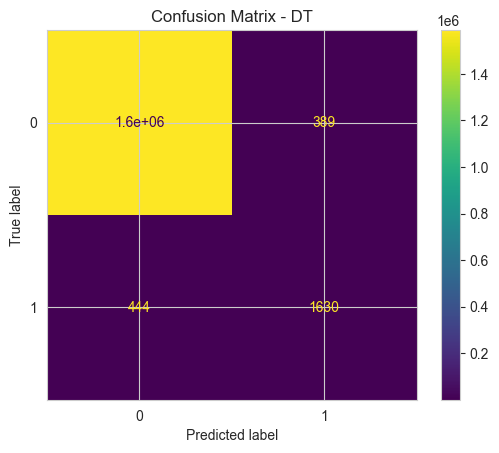

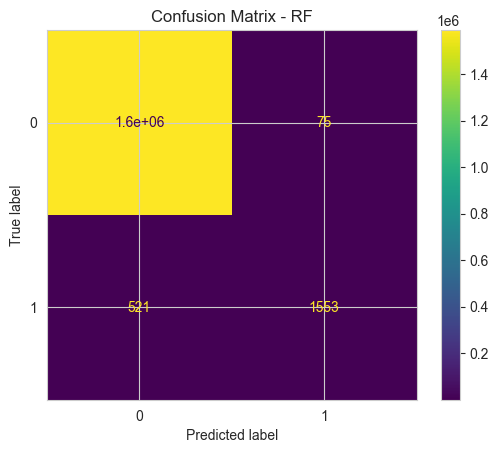

In [139]:
# visualising confusion matrix - DT

from sklearn.metrics import ConfusionMatrixDisplay
disp = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix_dt)
disp.plot()
plt.title('Confusion Matrix - DT')
plt.show()

# visualising confusion matrix - RF
disp = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix_rf)
disp.plot()
plt.title('Confusion Matrix - RF')
plt.show()

# KNN Model

In [140]:
# Model building KNN
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=3)
mod3 = knn.fit(x_train,y_train)
y_predk = mod3.predict(x_test)

# Model Testing
print('-'*75)
print('KNN')
print('-'*75)

print('-'*75)
print('Classification Report')
print('-'*75)
print(classification_report(y_test,y_predk))

print('-'*75)
print('Confusion Matrix')
print('-'*75)
print(confusion_matrix(y_test,y_predk))

print('-'*75)
print("Accuracy Score")
print('-'*75)

print(accuracy_score(y_test,y_predk))





---------------------------------------------------------------------------
KNN
---------------------------------------------------------------------------
---------------------------------------------------------------------------
Classification Report
---------------------------------------------------------------------------
              precision    recall  f1-score   support

           0       1.00      1.00      1.00   1588581
           1       0.88      0.69      0.78      2074

    accuracy                           1.00   1590655
   macro avg       0.94      0.85      0.89   1590655
weighted avg       1.00      1.00      1.00   1590655

---------------------------------------------------------------------------
Confusion Matrix
---------------------------------------------------------------------------
[[1588383     198]
 [    635    1439]]
---------------------------------------------------------------------------
Accuracy Score
--------------------------------------------

# Logistic Regression

In [141]:
# Model building Logistic Regression
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
mod4 = lr.fit(x_train,y_train)
y_predl = mod4.predict(x_test)

# Model Testing
print('-'*75)
print('Logistic')
print('-'*75)

print('-'*75)
print('Classification Report')
print('-'*75)
print(classification_report(y_test,y_predl))

print('-'*75)
print('Confusion Matrix')
print('-'*75)
print(confusion_matrix(y_test,y_predl))

print('-'*75)
print("Accuracy Score")
print('-'*75)

print(accuracy_score(y_test,y_predl))

---------------------------------------------------------------------------
Logistic
---------------------------------------------------------------------------
---------------------------------------------------------------------------
Classification Report
---------------------------------------------------------------------------
              precision    recall  f1-score   support

           0       1.00      1.00      1.00   1588581
           1       0.88      0.46      0.61      2074

    accuracy                           1.00   1590655
   macro avg       0.94      0.73      0.80   1590655
weighted avg       1.00      1.00      1.00   1590655

---------------------------------------------------------------------------
Confusion Matrix
---------------------------------------------------------------------------
[[1588448     133]
 [   1111     963]]
---------------------------------------------------------------------------
Accuracy Score
---------------------------------------

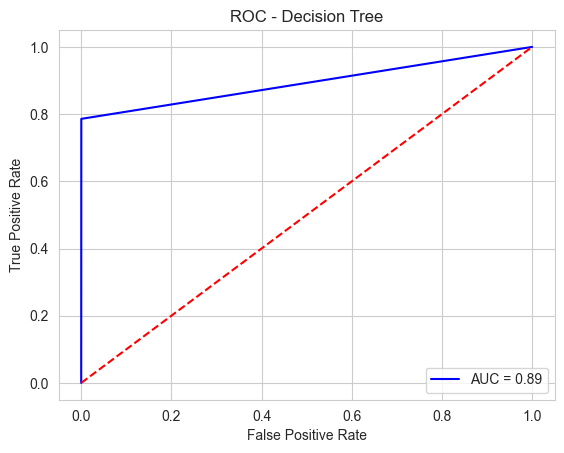

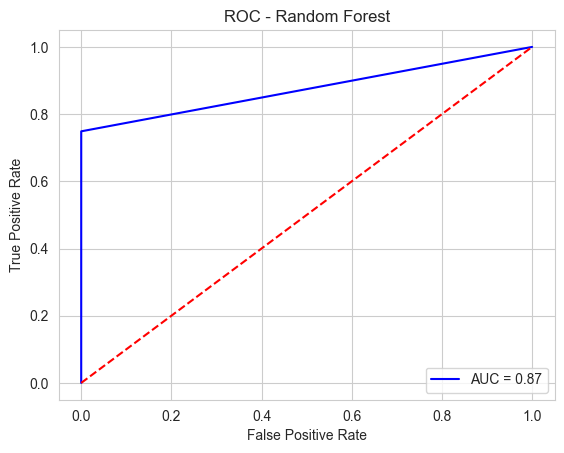

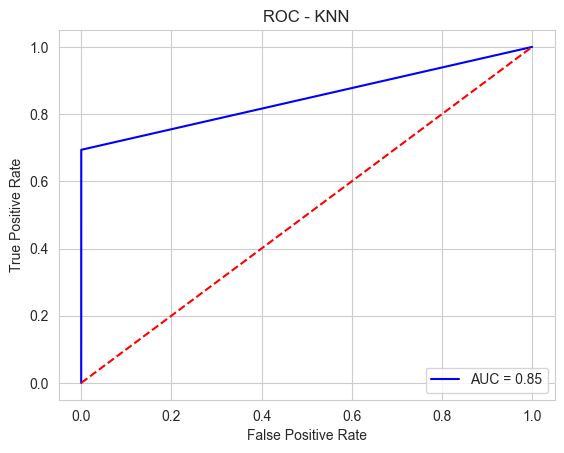

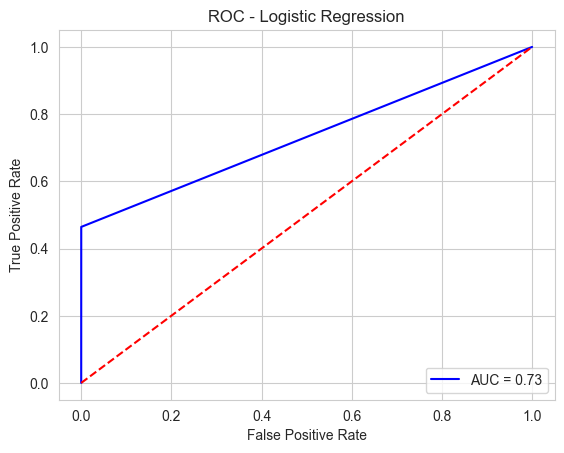

In [144]:
# AUC ROC - DT
# calculate the fpr and tpr for all thresholds of the classification
from sklearn import metrics

fpr, tpr, threshold = metrics.roc_curve(y_test,y_decision_tree)
roc_auc = metrics.auc(fpr, tpr)

plt.title('ROC - Decision Tree')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
# plt.xlim([0, 1])
# plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

# AUC ROC - RF
# calculate the fpr and tpr for all thresholds of the classification

fpr, tpr, threshold = metrics.roc_curve(y_test,y_predrf)
roc_auc = metrics.auc(fpr, tpr)

plt.title('ROC - Random Forest')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
# plt.xlim([0, 1])
# plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

# AUC ROC - KNN
# calculate the fpr and tpr for all thresholds of the classification

fpr, tpr, threshold = metrics.roc_curve(y_test,y_predk)
roc_auc = metrics.auc(fpr, tpr)

plt.title('ROC - KNN')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
# plt.xlim([0, 1])
# plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

# AUC ROC - Logistic Regression
# calculate the fpr and tpr for all thresholds of the classification

fpr, tpr, threshold = metrics.roc_curve(y_test,y_predl)
roc_auc = metrics.auc(fpr, tpr)

plt.title('ROC - Logistic Regression')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
# plt.xlim([0, 1])
# plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()                 

